### Import custom libraries

In [1]:
import image_processing
import aux

### Install the required libraries not installed in system

In [2]:
if not aux.check_library_installed('pandas'):
    !pip install pandas
    
if not aux.check_library_installed('sklearn'):
    !pip install -U scikit-learn

if not aux.check_library_installed('matplotlib'):
    !pip install matplotlib

if not aux.check_library_installed('numpy'):
    !pip install numpy

if not aux.check_library_installed('yellowbrick'):
    !pip install yellowbrick

if not aux.check_library_installed('pyts'):
    !pip install pyts

pandas
pandas already installed
sklearn
sklearn already installed
matplotlib
matplotlib already installed
numpy
numpy already installed
yellowbrick
yellowbrick already installed
pyts
pyts already installed


### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Preparation

#### Week consumptions with next_day_cluster

In [4]:
data = pd.read_csv ("../data/previos7_new.csv",sep=";",header=None)
data = data.iloc[:,1:] 
data.columns = [*data.columns[:-1], 'next_day_cluster']
data

,1,2,3,4,5,6,7,8,9,10,...,160,161,162,163,164,165,166,167,168,next_day_cluster
0,217,167,181,189,204,322,221,247,174,208,...,159,187,186,161,2658,1748,957,421,218,0
1,177,172,184,179,186,271,255,236,328,167,...,184,178,162,412,2938,848,926,1999,415,5
2,168,215,165,181,202,328,313,226,203,190,...,201,179,159,498,1015,757,620,1131,279,5
3,163,208,200,157,202,318,286,563,197,176,...,152,199,195,152,195,335,1105,685,205,5
4,214,202,164,202,151,316,256,145,190,215,...,163,200,197,160,207,200,181,174,193,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,174,169,175,172,152,188,409,336,251,147,...,150,143,119,149,135,131,121,144,149,5
525,192,171,191,194,166,308,1570,1397,196,164,...,145,125,143,151,124,121,172,121,121,5
526,173,149,172,177,148,284,419,1678,711,171,...,147,153,122,153,122,155,148,133,142,5
527,177,172,194,150,171,153,168,424,551,2944,...,127,173,123,157,127,157,146,154,129,5


### Week consumptions without next_day_cluster column

It will be necessary to generate the 2D images for each week consumption time series.

In [5]:
data_with_no_next_day_row = data.iloc[: , :-1]

In [6]:
data_with_no_next_day_row

,1,2,3,4,5,6,7,8,9,10,...,159,160,161,162,163,164,165,166,167,168
0,217,167,181,189,204,322,221,247,174,208,...,179,159,187,186,161,2658,1748,957,421,218
1,177,172,184,179,186,271,255,236,328,167,...,174,184,178,162,412,2938,848,926,1999,415
2,168,215,165,181,202,328,313,226,203,190,...,152,201,179,159,498,1015,757,620,1131,279
3,163,208,200,157,202,318,286,563,197,176,...,190,152,199,195,152,195,335,1105,685,205
4,214,202,164,202,151,316,256,145,190,215,...,155,163,200,197,160,207,200,181,174,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,174,169,175,172,152,188,409,336,251,147,...,120,150,143,119,149,135,131,121,144,149
525,192,171,191,194,166,308,1570,1397,196,164,...,147,145,125,143,151,124,121,172,121,121
526,173,149,172,177,148,284,419,1678,711,171,...,124,147,153,122,153,122,155,148,133,142
527,177,172,194,150,171,153,168,424,551,2944,...,158,127,173,123,157,127,157,146,154,129


### Example of hourly consumptions time series for a week of a random consumer

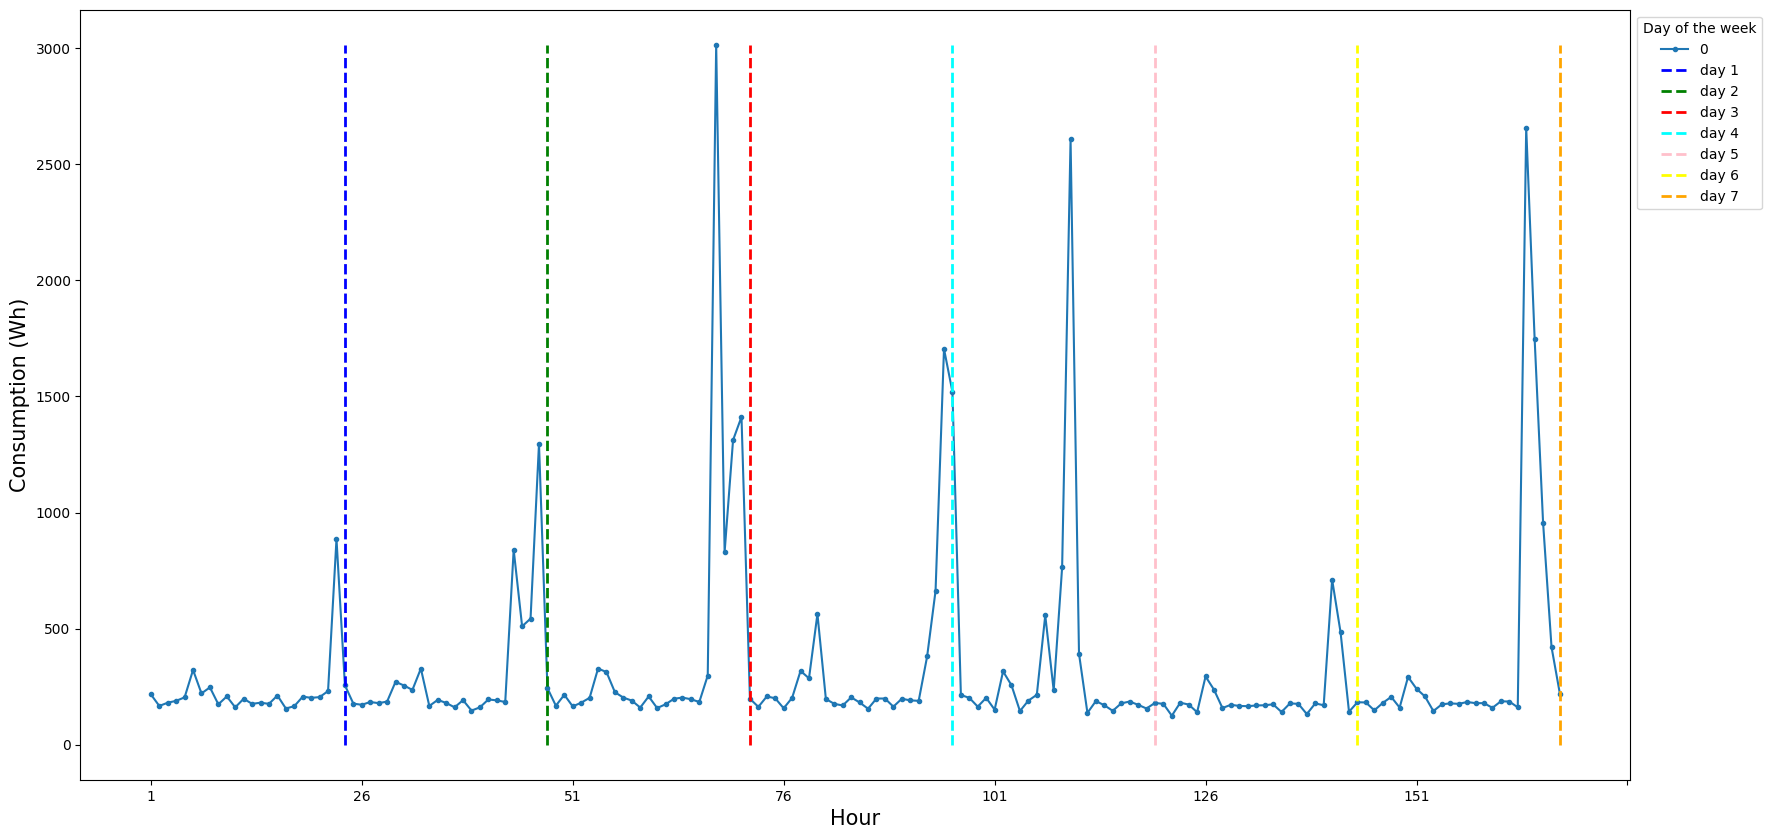

In [7]:
rowTS = (data_with_no_next_day_row.iloc[0])
aux.plot_time_series_with_week_separator(rowTS)

### Centroids for next day curves

Load 21 centroid model from Ireland

In [8]:
centroids = [ [ 666.40479893,  484.33481247,  403.49585082,  370.5242449 ,
         363.99568771,  391.12255842,  496.10640185,  659.05330929,
         732.29261459,  661.01002998,  626.41878595,  557.36233516,
         555.74481743,  628.43159322,  623.64899298,  647.05002927,
         688.73262013,  989.96810246, 1397.61470245, 1526.12345439,
        1467.50739569, 1424.30494595, 1277.73625541, 1007.61093758],
 [7988.88639466, 7268.74730775, 6804.77445776, 6640.17503413,
        6434.40785682, 6337.86303655, 6328.51327165, 6650.20203246,
        7212.94342484, 7726.6173214 , 8306.49582891, 8685.71105718,
        9029.67844684, 8995.13635674, 9000.76566055, 8950.58956469,
        9127.54664038, 9296.29713332, 9482.04307599, 9707.37919005,
        9684.54300015, 9512.9323525 , 8907.89276505, 8432.03579554],
 [5063.53569443, 4365.20704993, 3896.86967641, 3597.82525297,
        3459.25408651, 3456.88007339, 3567.78494385, 3849.55665518,
        4187.1664628 , 4334.57300122, 4484.80946292, 4604.65072834,
        4891.90164572, 4842.72334038, 4875.54475703, 5077.23446014,
        5581.56388302, 6209.94340042, 6724.0742244 , 7015.64422328,
        7026.27376849, 6932.77082175, 6616.3797954 , 5979.58968086],
 [ 664.64971722,  484.24338371,  403.54985479,  369.60886776,
         362.38005281,  393.0481233 ,  495.5519526 ,  690.89894635,
         841.49293436,  824.32571513,  840.90577216,  814.3801635 ,
         856.04135019,  902.06588095,  901.49747788, 1392.20289267,
        2653.60199451, 2977.45762989, 1610.71474955, 1378.71938267,
        1351.9737931 , 1336.13024388, 1202.78810991,  964.67879676],
 [8317.06892543, 8494.768477  , 8141.3019432 , 7593.31971433,
        6861.97176549, 6048.78790899, 5365.8445441 , 4482.35459226,
        2397.45523999, 2033.88739412, 2330.18285999, 2274.50357084,
        2217.54658695, 2044.82710513, 2013.83341638, 1976.31772131,
        1890.80468361, 1553.51934895, 1301.88290982, 1304.58379007,
        1332.65819631, 1404.31954825, 1763.12771965, 5746.45308088],
 [320.96178046, 255.8529408 , 229.07278026, 219.64003234,
        219.84097373, 230.34301883, 278.94034518, 365.18098082,
        400.59031706, 395.79920081, 372.54551802, 340.40825456,
        343.47485796, 352.78843204, 339.48136236, 350.84684382,
        383.45530162, 445.23904749, 459.05602476, 460.7941184 ,
        481.0623598 , 508.57178647, 488.21405724, 411.43217114],
 [ 744.03409614,  531.72816415,  450.16188436,  419.39059399,
         413.72691544,  434.3549074 ,  511.50830058,  770.96687654,
        2036.33027511, 4275.53008057, 2376.44072609, 1269.39402463,
        1136.45864168, 1099.6225371 , 1008.03069178, 1040.88979876,
        1179.39464241, 1439.46789521, 1541.92177868, 1564.42676691,
        1509.7273492 , 1470.47353409, 1314.84056047, 1037.55479173],
 [1601.16603784, 1170.65591189,  959.14439882,  878.8354325 ,
         843.33421184,  861.24551961, 1003.8459191 , 1423.54288964,
        2003.28488598, 2671.09454586, 3392.50585363, 3846.09160517,
        4295.97386673, 4593.98673917, 4619.61335516, 4631.94401598,
        4846.79961716, 5423.64528658, 5400.69708151, 4917.79620485,
        4308.65682739, 3766.67399989, 3124.9490096 , 2392.10758475],
 [3143.24018488, 2796.65769111, 2539.80058164, 2408.06945887,
        2377.95899979, 2403.00059722, 2524.84233486, 2824.19295285,
        2941.967984  , 2819.09906003, 2755.33350644, 2713.53733901,
        2693.8324678 , 2662.73995118, 2571.32922206, 2558.56930307,
        2656.32319796, 2854.96917844, 2976.30460636, 2999.86770357,
        3070.49085999, 3190.84841088, 3166.72546219, 3052.21214167],
 [ 924.00874251,  661.89334664,  548.39566201,  500.16010645,
         487.6160346 ,  507.34621424,  590.92546906,  818.70312708,
        1197.05776447, 1920.45172322, 4071.36357951, 4294.43602129,
        2469.61630073, 1647.86794411, 1424.84790419, 1408.84958084,
        1557.61201597, 1876.66726547, 1996.53409182, 2021.52737192,
        1928.34179641, 1826.09276114, 1607.99800399, 1261.05015303],
 [ 812.21019229,  574.68051668,  472.65269536,  433.00153241,
         427.64155564,  469.31139442,  633.07503918,  959.77076803,
        1098.21715461,  991.33350593,  982.19459528,  955.48468988,
         992.90856611, 1049.9502701 ,  969.16469576, 1005.36742891,
        1312.31778997, 2916.27394481, 4615.82014107, 3177.27366491,
        2249.42958604, 1897.53034035, 1592.4525932 , 1210.68650638],
 [ 642.57734751,  483.99367229,  403.49586352,  370.68959448,
         359.51990161,  370.07461016,  416.89810214,  523.60774039,
         728.8428407 ,  929.33392458, 1341.47870377, 1737.51633606,
        2046.35477174, 1563.61767427, 1046.05980638,  909.43473924,
         878.26403538,  957.53414122,  980.66428813,  948.69999323,
         956.18663598,  993.69464491,  951.83177397,  803.69112901],
 [ 878.4607494 ,  650.14644639,  533.69427373,  472.9124521 ,
         452.51305039,  463.77182597,  528.63582713,  700.44790688,
         930.56599306, 1070.47802943, 1222.95578772, 1297.33524329,
        1498.10612031, 2541.81275757, 3764.96807895, 3080.80275287,
        1989.60919312, 1668.09438038, 1638.56510737, 1642.48099378,
        1590.33541501, 1571.93889632, 1436.67476141, 1183.35150206],
 [1214.39438737, 1128.04979955, 1082.22638436, 1067.5663994 ,
        1058.08312453, 1050.55712854, 1090.87214984, 1445.62189927,
        3157.46172638, 7300.26265347, 8970.56746429, 9258.00745427,
        9114.90967176, 8316.58926334, 8724.38893761, 8678.63148334,
        8195.13248559, 6048.81589827, 2487.61644951, 1572.3070659 ,
        1318.12722375, 1259.56840391, 1214.6663117 , 1195.21485843],
 [3727.43318769, 3534.45903878, 3398.14127071, 3392.89249954,
        3368.24003277, 3374.38494447, 3544.37156381, 4360.42799927,
        6742.08747497, 9087.88376115, 9860.98124886, 9872.27571455,
        9851.59894411, 9491.13890406, 9352.42508647, 9260.12980157,
        9077.31139632, 7964.41307118, 6086.85882032, 5149.9208083 ,
        4354.26697615, 3901.54951757, 3563.21017659, 3571.9576734 ],
 [ 913.61542846,  781.63053205,  724.87335784,  706.45008692,
         704.80832692,  716.9262489 ,  825.49348836, 1145.99270468,
        2275.2919837 , 4475.50676812, 5440.60058135, 5554.70519506,
        5347.03126158, 4596.07266821, 4666.11293494, 4441.23652788,
        4042.72155253, 2942.87446924, 1637.88943034, 1323.41953777,
        1210.021373  , 1164.52400901, 1074.35912342,  965.97936793],
 [1104.78540487,  744.46498413,  585.5849443 ,  523.93598681,
         506.04348665,  541.99653327,  676.98950022,  969.2010145 ,
        1072.42832514,  945.66657746,  950.52198917,  937.85971868,
         967.88452107, 1014.9711396 ,  960.02245597, 1022.0998444 ,
        1160.32115516, 1427.85995519, 1800.21212423, 2745.17020601,
        3488.90814713, 3503.88833634, 2835.28454596, 1999.12927118],
 [1046.19702105,  743.46590955,  592.95869175,  524.10774715,
         499.38476497,  514.20733799,  593.71533901,  795.06843747,
        1088.80015664, 1319.82150622, 1615.09671452, 2615.47429544,
        4912.85032342, 3966.45790177, 2197.99292399, 1708.58566162,
        1698.25493903, 2016.31886622, 2229.6629306 , 2262.28522815,
        2153.13864394, 2075.5511458 , 1831.67612386, 1454.3954195 ],
 [1076.95739708,  767.7100562 ,  624.48005518,  558.85659564,
         539.21520344,  573.39004982,  735.66330358, 1175.04610281,
        1454.24856071, 1441.21697048, 1483.09184081, 1487.34782311,
        1584.88762726, 1790.97665219, 2100.87661457, 3135.88287333,
        4713.39260349, 4781.55077123, 3304.97372231, 2832.91886407,
        2614.59946191, 2434.11538242, 2092.13811462, 1608.12465087],
 [ 899.11416455,  684.02896997,  603.9178668 ,  582.95995188,
         597.02198954,  686.6068089 , 1234.00469333, 3534.1331761 ,
        2925.28366032, 1326.86539447, 1014.67541007,  952.45652718,
        1004.1651598 , 1033.69487427,  984.78516718, 1098.29171283,
        1332.94560983, 1725.28576874, 1808.8681104 , 1860.87802118,
        1773.77294548, 1722.19795352, 1549.18947218, 1225.38493609],
 [1433.63696948,  960.17417448,  757.08174241,  685.69120275,
         667.90362613,  713.51926642,  934.18354462, 1577.26653973,
        1825.25386247, 1631.31427569, 1592.29403217, 1551.69000017,
        1578.45990546, 1631.1542483 , 1610.63678576, 1772.0194418 ,
        2343.52502881, 3659.63499858, 4914.64129545, 5772.12142774,
        5439.95091113, 4704.81967898, 3740.83264018, 2635.09949725] ]

Convert list with centroids to time series data frame

In [16]:
dfCentroids = pd.DataFrame(centroids, columns = [*range(0, 24, 1)] ) 
dfCentroids = dfCentroids.round(0)
dfCentroids = dfCentroids.astype(int)
dfCentroids

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,666,484,403,371,364,391,496,659,732,661,...,624,647,689,990,1398,1526,1468,1424,1278,1008
1,7989,7269,6805,6640,6434,6338,6329,6650,7213,7727,...,9001,8951,9128,9296,9482,9707,9685,9513,8908,8432
2,5064,4365,3897,3598,3459,3457,3568,3850,4187,4335,...,4876,5077,5582,6210,6724,7016,7026,6933,6616,5980
3,665,484,404,370,362,393,496,691,841,824,...,901,1392,2654,2977,1611,1379,1352,1336,1203,965
4,8317,8495,8141,7593,6862,6049,5366,4482,2397,2034,...,2014,1976,1891,1554,1302,1305,1333,1404,1763,5746
5,321,256,229,220,220,230,279,365,401,396,...,339,351,383,445,459,461,481,509,488,411
6,744,532,450,419,414,434,512,771,2036,4276,...,1008,1041,1179,1439,1542,1564,1510,1470,1315,1038
7,1601,1171,959,879,843,861,1004,1424,2003,2671,...,4620,4632,4847,5424,5401,4918,4309,3767,3125,2392
8,3143,2797,2540,2408,2378,2403,2525,2824,2942,2819,...,2571,2559,2656,2855,2976,3000,3070,3191,3167,3052
9,924,662,548,500,488,507,591,819,1197,1920,...,1425,1409,1558,1877,1997,2022,1928,1826,1608,1261


**Plot centroids**

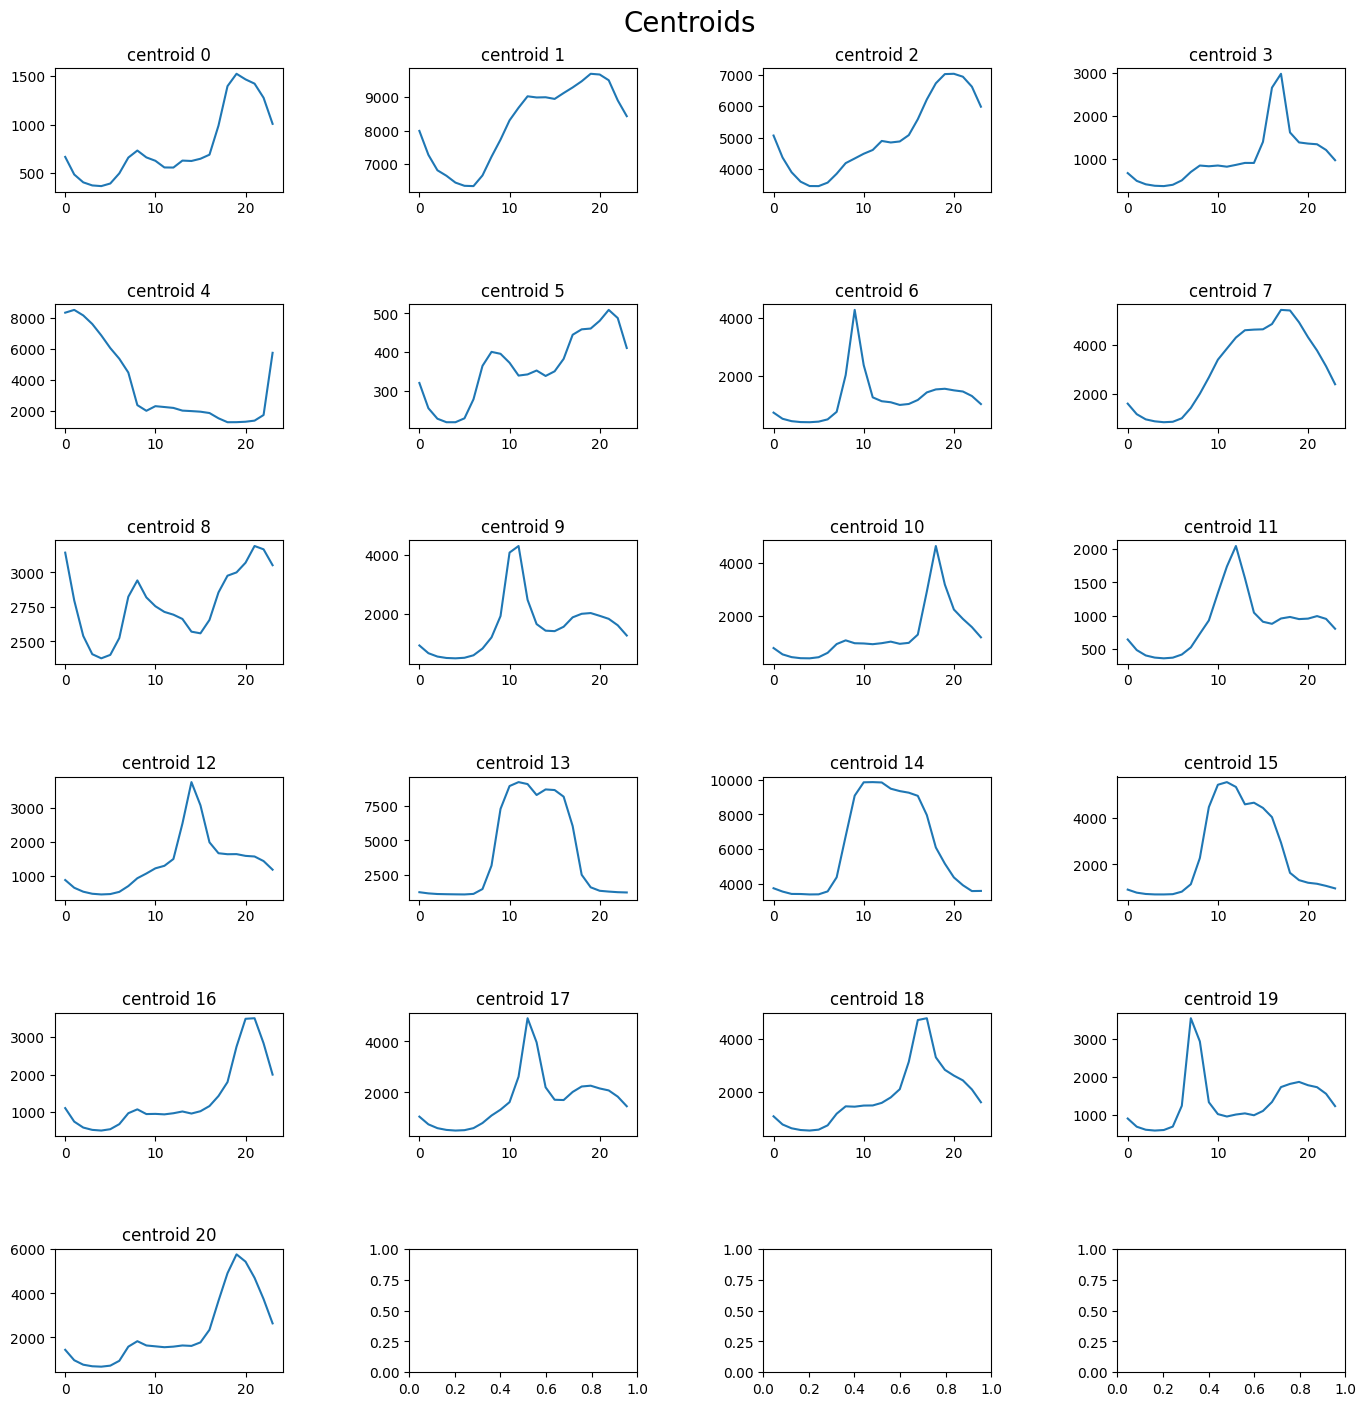

In [17]:
M =6
N= 4
fig, axs = plt.subplots(M, N,figsize=(15,15))
fig.tight_layout(pad=6.0)
fig.suptitle('Centroids', fontsize=20)
centroids_id = 0
for i in range(M):
    for j in range(N):
            if centroids_id<len(centroids):
                axs[i,j].plot(dfCentroids.iloc[centroids_id])
                axs[i, j].set_title("centroid " + str(centroids_id))
                centroids_id+=1

## Imaging Time Series

### Modelling Neural Network Input Week Time series as 2D images

Each weekly consumption time series is converted to a 2D image format that can be manipulated by the deep learning algorithms.

**Example of first week consumption of time series dataframe**

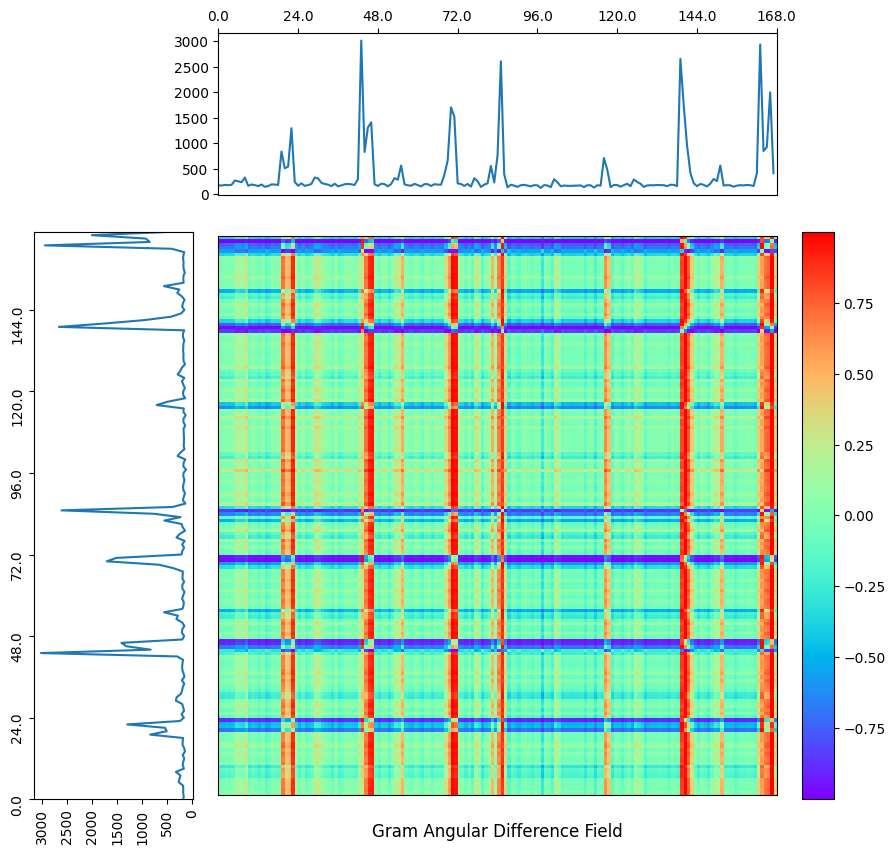

In [20]:
ts_week = data_with_no_next_day_row.iloc[1]
gaf_ts_diff = image_processing.transform_image_with_gram_angular_field(ts_week, method='difference')
image_processing.plot_gram_angular_field(ts_week,gaf_ts_diff)

### Example of cluster in Gram Domain

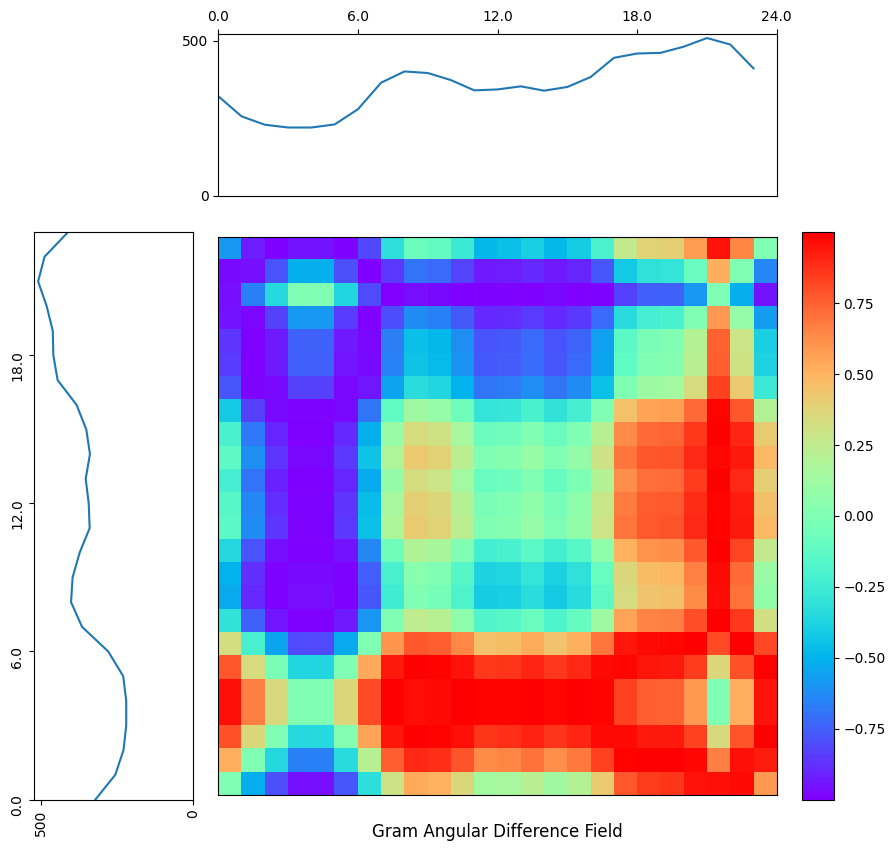

In [19]:

ts_cluster = dfCentroids.iloc[5]
gaf_ts_diff = image_processing.transform_image_with_gram_angular_field(ts_cluster, method='difference')
image_processing.plot_gram_angular_field (ts_cluster,gaf_ts_diff,type_ts='cluster')

### Generate input neural network images (week consumptions on Gram domain)

In [21]:
# calcuate Gramian Angular Difference Field
input_nn = data_with_no_next_day_row.apply( 
    image_processing.transform_image_with_gram_angular_field,
    axis=1)


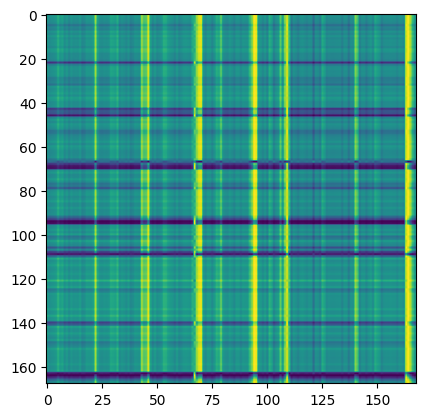

In [22]:
plt.imshow(input_nn.iloc[0])

### Generate output neural network (next day consumption cluster on Gran Domain)

**Esto solo lo usaremos si nos da por probar a entrenar modelos con la transformada de Gramm de los clusteres de consumo del día siguiente como etiqueta (salida de la red), suponiendo que fuera posible. Nuestra primera alternativa solo usará las entradas (consumos semanales) en el dominio de Gramm. La salida para entrenar los modelos y lo que los modelos serán capaces de predecir, serán las propias etiquetas del cluster del día siguiente.**

In [23]:
# Calculate Gramian Angular Difference Field
output_nn = dfCentroids.apply( 
    image_processing.transform_image_with_gram_angular_field,
    axis=1)

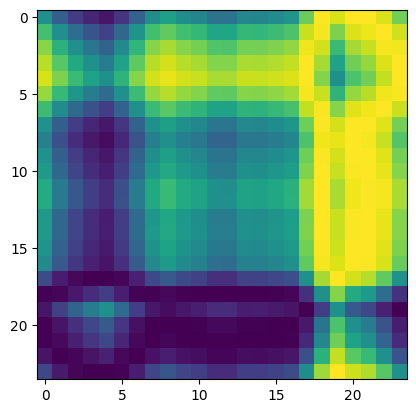

In [24]:
plt.imshow(output_nn.iloc[0])

### Save input (week) and output (daily) Gram domain images

In [27]:
output_nn

0     [[0.0, -0.4037226302527086, -0.645304493483129...
1     [[0.0, -0.4280029737667441, -0.706122685758430...
2     [[0.0, -0.40209573902813134, -0.68429340710168...
3     [[0.0, -0.25636130518983574, -0.42641785837555...
4     [[0.0, 0.3107018035224324, -0.1310994768397327...
5     [[0.0, -0.5172117268044065, -0.789636347090591...
6     [[0.0, -0.23954100917984505, -0.38932154096231...
7     [[0.0, -0.291770439837525, -0.4953399283032275...
8     [[0.0, -0.8670060222704974, -0.988093464634431...
9     [[0.0, -0.2566967081904588, -0.424838477068446...
10    [[0.0, -0.23608890678639732, -0.39638751368138...
11    [[0.0, -0.29071879786941707, -0.49989132256597...
12    [[0.0, -0.23768075284492218, -0.40653624383080...
13    [[0.0, -0.08865559690236785, -0.15912453695567...
14    [[0.0, -0.1528206349171743, -0.331957107556178...
15    [[0.0, -0.16478824461857927, -0.28566141748345...
16    [[0.0, -0.34810409498100964, -0.56350008593798...
17    [[0.0, -0.24236455802196433, -0.4137471713

In [26]:
import os  

os.makedirs('../data/images/input', exist_ok=True)  
input_nn.to_csv('../data/images/input/input_images.csv') 

os.makedirs('../data/images/output', exist_ok=True)  
output_nn.to_csv('../data/images/output/output_images.csv') 

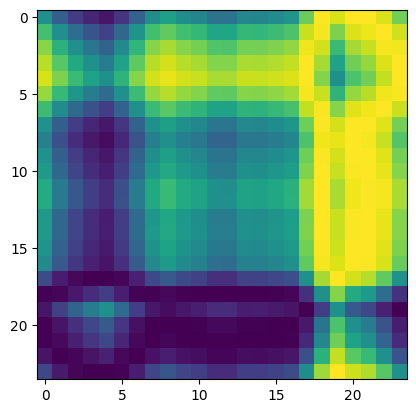

In [32]:
plt.imshow(output_nn.iloc[0])

In [33]:
output_nn.iloc[0]

array([[ 0.        , -0.40372263, -0.64530449, -0.79226966, -0.87715545,
        -0.69170488, -0.37311088, -0.01378757,  0.12519882, -0.00983758,
        -0.08025461, -0.22834557, -0.23059859, -0.07615408, -0.0843649 ,
        -0.03767073,  0.04458658,  0.54670204,  0.98459826,  0.87715545,
         0.99873731,  0.99493473,  0.89624698,  0.57248833],
       [ 0.40372263,  0.        , -0.2819631 , -0.47849292, -0.60862299,
        -0.34126743,  0.0332163 ,  0.39107027,  0.51508808,  0.39470287,
         0.32899692,  0.18414722,  0.18187152,  0.33287829,  0.32509945,
         0.36897182,  0.44411258,  0.8382155 ,  0.97137435,  0.60862299,
         0.89344432,  0.95083073,  0.99903306,  0.85477632],
       [ 0.64530449,  0.2819631 ,  0.        , -0.21148881, -0.36020194,
        -0.06238479,  0.31367607,  0.63471048,  0.73586959,  0.63775809,
         0.58191445,  0.45381665,  0.45175274,  0.58525453,  0.57855544,
         0.61606883,  0.67872358,  0.95797063,  0.86497964,  0.36020194,
  

## Train Deep Larning model